## My very very rough draft notebook 
Some graphs don't plot anymore since I moved the data folder and accidentally reran the cells. Code did work at one point though!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# Update this path to match your actual file location
data_folder = "data-gpda" # updated

# Define the column names based on the header info
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Load the data
df = pd.read_csv(data_folder, sep=r'\s+', comment='#', names=columns) df = pd.read_csv(filepath

# Rename date/time columns to match what pandas expects
df.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)

# Create a proper datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Set datetime as index
df.set_index('datetime', inplace=True)

# Drop the now-unneeded date/time columns
df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

# Replace bad placeholder values (999, 999.0, 9999.0) with NaN
df.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)

# Preview
df.head()


SyntaxError: invalid syntax (2082123579.py, line 12)

## LINKS to DATASETS

https://www.ndbc.noaa.gov/station_history.php?station=kwhh1

https://www.ndbc.noaa.gov/station_history.php?station=51210 

In [15]:
airtemp_path = "/Users/chandlerbergstrom/Downloads/51002h2020.txt"

# Define column names from the dataset header
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Read the data
df_air = pd.read_csv(airtemp_path, sep=r'\s+', comment='#', names=columns)

# Rename date/time columns for pandas
df_air.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)

# Convert to datetime
df_air['datetime'] = pd.to_datetime(df_air[['year', 'month', 'day', 'hour', 'minute']])
df_air.set_index('datetime', inplace=True)

# Drop separate date/time columns
df_air.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

# Replace placeholder values with NaN
df_air.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)

# Drop rows where ATMP or WTMP is missing
df_air = df_air.dropna(subset=['ATMP', 'WTMP'])

# Then convert to float
df_air[['ATMP', 'WTMP']] = df_air[['ATMP', 'WTMP']].astype(float)

# Convert temps to float
df_air[['ATMP', 'WTMP']] = df_air[['ATMP', 'WTMP']].astype(float)

df_air[['ATMP', 'WTMP']].head()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/chandlerbergstrom/Downloads/51002h2020.txt'

In [16]:

# Make sure only good data is used
combo = df_air[['ATMP', 'WTMP']].copy()

# Plot
fig, ax1 = plt.csubplots(figsize=(14, 6))

# Air Temp on left axis
ax1.plot(combo.index, combo['ATMP'], color='skyblue', label='Air Temp (°C)')
ax1.set_ylabel('Air Temp (°C)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Water Temp on right axis
ax2 = ax1.twinx()
ax2.plot(combo.index, combo['WTMP'], color='coral', label='Water Temp (°C)')
ax2.set_ylabel('Water Temp (°C)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Format x-axis to show months or zoom to specific date range if needed
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Title and styling
plt.title('Air vs Water Temperature – 2020')
plt.grid(True)
fig.tight_layout()
plt.show()



NameError: name 'df_air' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
df['WTMP'].astype(float).plot(title='Water Temperature Over Time (°C)', ylabel='Temperature (°C)', color='orange')
plt.grid()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

df['ATMP'].dropna().astype(float).plot(
    title='Air Temperature Over Time (°C)',
    ylabel='Air Temp (°C)',
    color='teal'
)

plt.grid(True)
plt.show()


In [ ]:
# COMPILING 



In [ ]:
import pandas as pd

# Update this path to match your system
airtemp_path = "/Users/chandlerbergstrom/Downloads/51002h2020.txt"  # ⬅️ update this as needed

# Define column names from the dataset header
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Read the data
df_air = pd.read_csv(airtemp_path, sep=r'\s+', comment='#', names=columns)

# Rename date/time columns for pandas
df_air.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)

# Convert to datetime
df_air['datetime'] = pd.to_datetime(df_air[['year', 'month', 'day', 'hour', 'minute']])
df_air.set_index('datetime', inplace=True)

# Drop separate date/time columns
df_air.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

# Replace placeholder values with NaN
df_air.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)

# Drop rows where ATMP or WTMP is missing
df_air = df_air.dropna(subset=['ATMP', 'WTMP'])

# Then convert to float
df_air[['ATMP', 'WTMP']] = df_air[['ATMP', 'WTMP']].astype(float)

# Convert temps to float
df_air[['ATMP', 'WTMP']] = df_air[['ATMP', 'WTMP']].astype(float)

# Preview
df_air[['ATMP', 'WTMP']].head()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure only good data is used
combo = df_air[['ATMP', 'WTMP']].copy()

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Air Temp on left axis
ax1.plot(combo.index, combo['ATMP'], color='skyblue', label='Air Temp (°C)')
ax1.set_ylabel('Air Temp (°C)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Water Temp on right axis
ax2 = ax1.twinx()
ax2.plot(combo.index, combo['WTMP'], color='coral', label='Water Temp (°C)')
ax2.set_ylabel('Water Temp (°C)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Format x-axis to show months or zoom to specific date range if needed
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Title and styling
plt.title('Air vs Water Temperature – 2020')
plt.grid(True)
fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Path to your data folder
data_folder = "data-gpda"

# Columns based on file structure
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Loop through all files in the data folder
for filename in sorted(os.listdir(data_folder)):
    if filename.endswith(".txt"):
        filepath = os.path.join(data_folder, filename)
        print(f"Processing {filename}...")

        # Load data
        df = pd.read_csv(filepath, sep=r'\s+', comment='#', names=columns)

        # Fix datetime
        df.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']], errors='coerce')
        df.set_index('datetime', inplace=True)
        df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

        # Clean and filter data
        df.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)
        df = df.dropna(subset=['ATMP', 'WTMP'])

        try:
            df[['ATMP', 'WTMP']] = df[['ATMP', 'WTMP']].astype(float)
        except Exception as e:
            print(f"⚠️ Skipping {filename} due to conversion error: {e}")
            continue

        # Plot
        fig, ax1 = plt.subplots(figsize=(14, 6))
        ax1.plot(df.index, df['ATMP'], color='skyblue', label='Air Temp')
        ax1.set_ylabel('Air Temp (°C)', color='skyblue')
        ax1.tick_params(axis='y', labelcolor='skyblue')

        ax2 = ax1.twinx()
        ax2.plot(df.index, df['WTMP'], color='coral', label='Water Temp')
        ax2.set_ylabel('Water Temp (°C)', color='coral')
        ax2.tick_params(axis='y', labelcolor='coral')

        ax1.xaxis.set_major_locator(mdates.MonthLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

        year = filename[6:10]
        plt.title(f'Air vs Water Temperature – {year}')
        plt.grid(True)
        fig.tight_layout()

        # Save the plot
        out_filename = f"air_water_temp_{year}.png"
        plt.savefig(out_filename, dpi=300)
        plt.close()

        print(f"✅ Saved plot: {out_filename}")


In [2]:
import pandas as pd
import os

# Folder where your files live
data_folder = "data-gpda"
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Empty list to collect data from each year
all_years = []

for filename in sorted(os.listdir(data_folder)):
    if filename.endswith(".txt"):
        filepath = os.path.join(data_folder, filename)
        df = pd.read_csv(filepath, sep=r'\s+', comment='#', names=columns)
        df.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']], errors='coerce')
        df.set_index('datetime', inplace=True)
        df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)
        df.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)
        df = df.dropna(subset=['ATMP', 'WTMP'])
        df[['ATMP', 'WTMP']] = df[['ATMP', 'WTMP']].astype(float)
        all_years.append(df[['ATMP', 'WTMP']])

# Combine into one DataFrame
df_all = pd.concat(all_years)


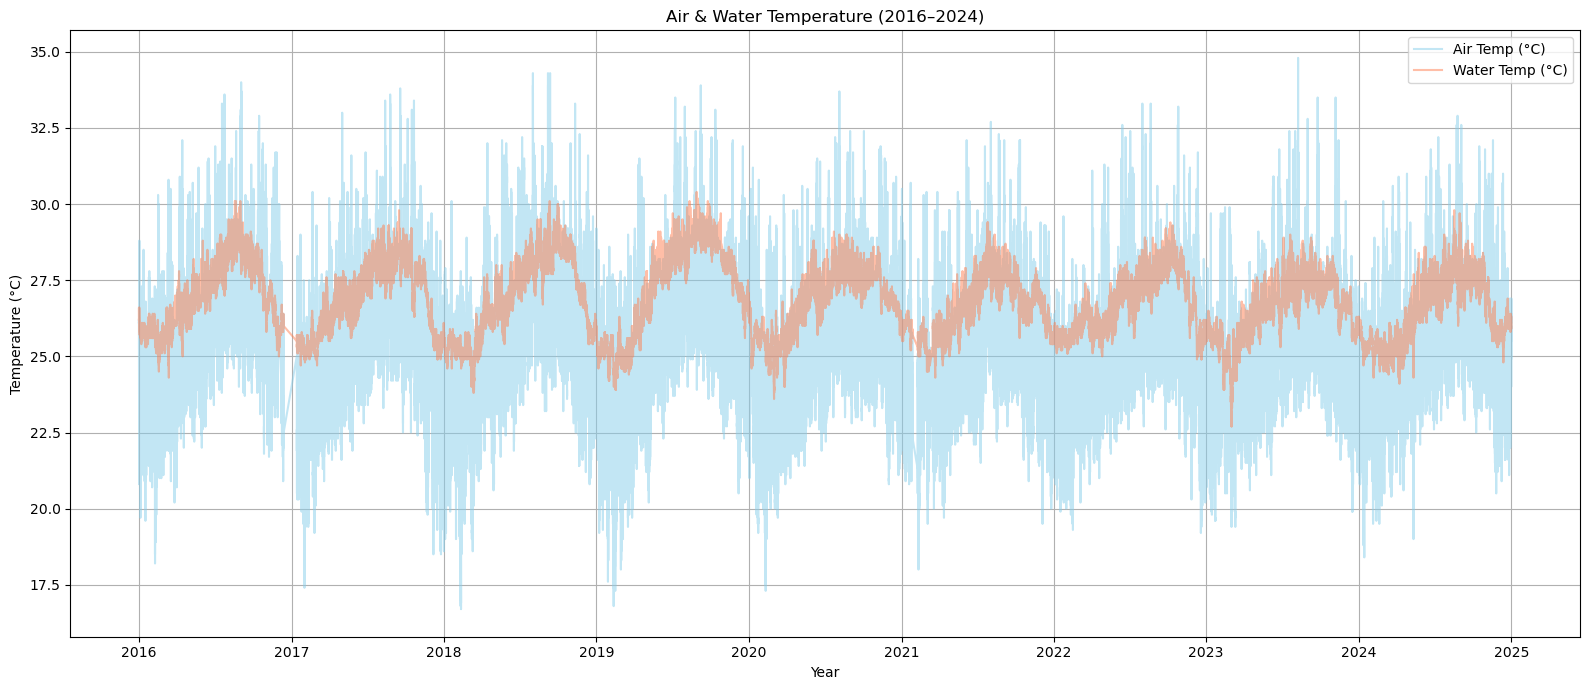

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(16, 7))

# Air Temp
plt.plot(df_all.index, df_all['ATMP'], label='Air Temp (°C)', color='skyblue', alpha=0.5)

# Water Temp
plt.plot(df_all.index, df_all['WTMP'], label='Water Temp (°C)', color='coral', alpha=0.5)

plt.title('Air & Water Temperature (2016–2024)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)

# Format x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


In [4]:
# Make a copy to avoid modifying original
df_summary = df_all.copy()

# Extract year from datetime
df_summary['year'] = df_summary.index.year

# Group by year and calculate mean and std dev
yearly_stats = df_summary.groupby('year').agg({
    'ATMP': ['mean', 'std'],
    'WTMP': ['mean', 'std']
})

# Flatten column names
yearly_stats.columns = ['ATMP_mean', 'ATMP_std', 'WTMP_mean', 'WTMP_std']
yearly_stats = yearly_stats.reset_index()

# Preview the summary
yearly_stats


,year,ATMP_mean,ATMP_std,WTMP_mean,WTMP_std
0,2016,25.921507,1.821757,26.954880,1.125424
1,2017,25.579143,1.899277,26.829629,1.101025
2,2018,25.771448,1.961936,26.852308,1.330938
3,2019,25.794833,2.144123,27.212716,1.555469
4,2020,25.459934,1.721434,26.659732,1.052219
5,2021,25.373878,1.632937,26.561948,0.897921
6,2022,25.401131,1.585606,26.626785,0.939773
7,2023,25.320149,1.599468,26.459979,0.993709
8,2024,25.446048,1.676085,26.399936,1.092002


## All Years- SD and Mean Air and Water

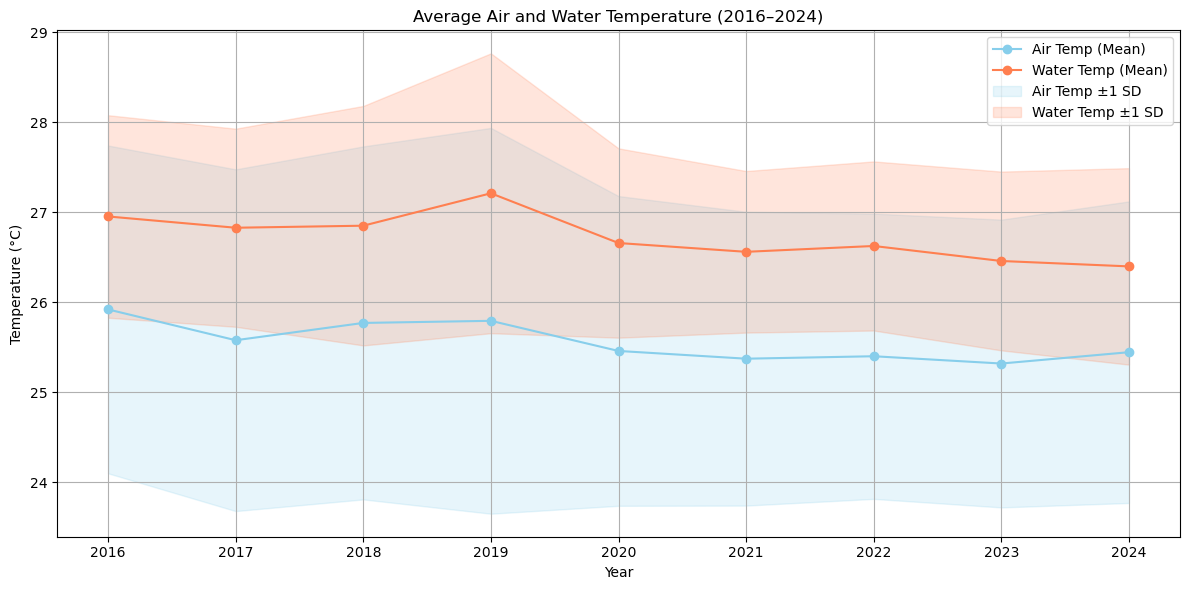

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# X values (years)
years = yearly_stats['year']

# Plot mean temps
plt.plot(years, yearly_stats['ATMP_mean'], label='Air Temp (Mean)', color='skyblue', marker='o')
plt.plot(years, yearly_stats['WTMP_mean'], label='Water Temp (Mean)', color='coral', marker='o')

# Shaded area: ±1 std dev
plt.fill_between(years,
                 yearly_stats['ATMP_mean'] - yearly_stats['ATMP_std'],
                 yearly_stats['ATMP_mean'] + yearly_stats['ATMP_std'],
                 color='skyblue', alpha=0.2, label='Air Temp ±1 SD')

plt.fill_between(years,
                 yearly_stats['WTMP_mean'] - yearly_stats['WTMP_std'],
                 yearly_stats['WTMP_mean'] + yearly_stats['WTMP_std'],
                 color='coral', alpha=0.2, label='Water Temp ±1 SD')

# Labels & styling
plt.title('Average Air and Water Temperature (2016–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import matplotlib.pyplot as plt

# Group by year first
for year in range(2016, 2025):
    df_year = df_all[df_all.index.year == year]

    # Resample by day (or change to 'M' for monthly)
    daily = df_year.resample('D').agg({
        'ATMP': ['mean', 'std'],
        'WTMP': ['mean', 'std']
    }).dropna()

    # Flatten column names
    daily.columns = ['ATMP_mean', 'ATMP_std', 'WTMP_mean', 'WTMP_std']

    # Plot
    plt.figure(figsize=(12, 6))

    # Air Temp
    plt.plot(daily.index, daily['ATMP_mean'], color='skyblue', label='Air Temp (Mean)')
    plt.fill_between(daily.index,
                     daily['ATMP_mean'] - daily['ATMP_std'],
                     daily['ATMP_mean'] + daily['ATMP_std'],
                     color='skyblue', alpha=0.2, label='Air Temp ±1 SD')

    # Water Temp
    plt.plot(daily.index, daily['WTMP_mean'], color='coral', label='Water Temp (Mean)')
    plt.fill_between(daily.index,
                     daily['WTMP_mean'] - daily['WTMP_std'],
                     daily['WTMP_mean'] + daily['WTMP_std'],
                     color='coral', alpha=0.2, label='Water Temp ±1 SD')

    # Labels
    plt.title(f'Daily Avg Air & Water Temp with ±1 SD – {year}')
    plt.ylabel('Temperature (°C)')
    plt.xlabel('Date')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Save or show
    plt.savefig(f"daily_temp_sd_{year}.png", dpi=300)
    plt.close()


## Heat/Contour Map- DAILY

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copy original dataframe
df_plot = df_all.copy()

# Drop rows with missing temps
df_plot = df_plot.dropna(subset=['ATMP', 'WTMP'])

# Add time components
df_plot['year'] = df_plot.index.year
df_plot['dayofyear'] = df_plot.index.dayofyear

# Pivot tables
pivot_air = df_plot.pivot_table(index='dayofyear', columns='year', values='ATMP')
pivot_water = df_plot.pivot_table(index='dayofyear', columns='year', values='WTMP')

# Set up plots
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Air Temp Heatmap
sns.heatmap(pivot_air, ax=axes[0], cmap='coolwarm', cbar_kws={'label': 'Air Temp (°C)'})
axes[0].set_title('Air Temperature (°C) – Day of Year vs. Year')
axes[0].set_ylabel('Day of Year')

# Water Temp Heatmap
sns.heatmap(pivot_water, ax=axes[1], cmap='coolwarm', cbar_kws={'label': 'Water Temp (°C)'})
axes[1].set_title('Water Temperature (°C) – Day of Year vs. Year')
axes[1].set_ylabel('Day of Year')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

## Heat/Contour Map- MONTHLY

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values
df_month = df_all.dropna(subset=['ATMP', 'WTMP'])

# Add year and month columns
df_month['year'] = df_month.index.year
df_month['month'] = df_month.index.month

# Group by year/month and average
monthly_avg = df_month.groupby(['month', 'year'])[['ATMP', 'WTMP']].mean().unstack()

# Extract air and water temp separately
air_temp = monthly_avg['ATMP']
water_temp = monthly_avg['WTMP']

# Set up plots
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Air Temp Heatmap
sns.heatmap(air_temp, ax=axes[0], cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Air Temp (°C)'})
axes[0].set_title('Monthly Avg Air Temperature (°C)')
axes[0].set_ylabel('Month')

# Water Temp Heatmap
sns.heatmap(water_temp, ax=axes[1], cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Water Temp (°C)'})
axes[1].set_title('Monthly Avg Water Temperature (°C)')
axes[1].set_ylabel('Month')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()


## Heat/Contour Map- MONTHLY w/ El Nino lines

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define El Niño years
el_nino_years = [2015, 2016, 2018, 2019, 2023, 2024]

# Drop missing values
df_month = df_all.dropna(subset=['ATMP', 'WTMP'])

# Add year/month columns
df_month['year'] = df_month.index.year
df_month['month'] = df_month.index.month

# Group monthly means
monthly_avg = df_month.groupby(['month', 'year'])[['ATMP', 'WTMP']].mean().unstack()

# Get individual DataFrames
air_temp = monthly_avg['ATMP']
water_temp = monthly_avg['WTMP']

# Set up plots
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot air temperature heatmap
sns.heatmap(air_temp, ax=axes[0], cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Air Temp (°C)'})
axes[0].set_title('Monthly Avg Air Temperature (°C)')
axes[0].set_ylabel('Month')

# Plot water temperature heatmap
sns.heatmap(water_temp, ax=axes[1], cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Water Temp (°C)'})
axes[1].set_title('Monthly Avg Water Temperature (°C)')
axes[1].set_ylabel('Month')
axes[1].set_xlabel('Year')

# Add vertical highlight lines for El Niño years
for ax in axes:
    for year in el_nino_years:
        if year in air_temp.columns:  # Only draw if year exists in data
            ax.axvline(x=air_temp.columns.get_loc(year), color='gold', linestyle='--', linewidth=2, alpha=0.7)
            ax.text(air_temp.columns.get_loc(year) + 0.1, 0.5, 'El Niño', rotation=90, va='center',
                    fontsize=9, color='gold', alpha=0.8, transform=ax.get_xaxis_transform())

plt.tight_layout()
plt.show()


## Anomly Graph 

In [ ]:
baseline = df_all[(df_all.index.year >= 2016) & (df_all.index.year <= 2024)]
baseline_avg = baseline.groupby(baseline.index.month)[['ATMP', 'WTMP']].mean()


In [ ]:
df_anom = df_all.copy()
df_anom['month'] = df_anom.index.month
df_anom['year'] = df_anom.index.year

# Calculate anomalies for air and water temp
df_anom['ATMP_anom'] = df_anom.apply(lambda row: row['ATMP'] - baseline_avg.loc[row['month'], 'ATMP'], axis=1)
df_anom['WTMP_anom'] = df_anom.apply(lambda row: row['WTMP'] - baseline_avg.loc[row['month'], 'WTMP'], axis=1)


In [ ]:
# Group by year & month
anom_monthly = df_anom.groupby(['year', 'month'])[['ATMP_anom', 'WTMP_anom']].mean().unstack()

# Plot
anom_monthly['ATMP_anom'].T.plot(figsize=(14, 6), cmap='coolwarm', title='Monthly Air Temp Anomalies (vs. 2016–2019 Baseline)')
plt.xlabel('Month')
plt.ylabel('Temp Anomaly (°C)')
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


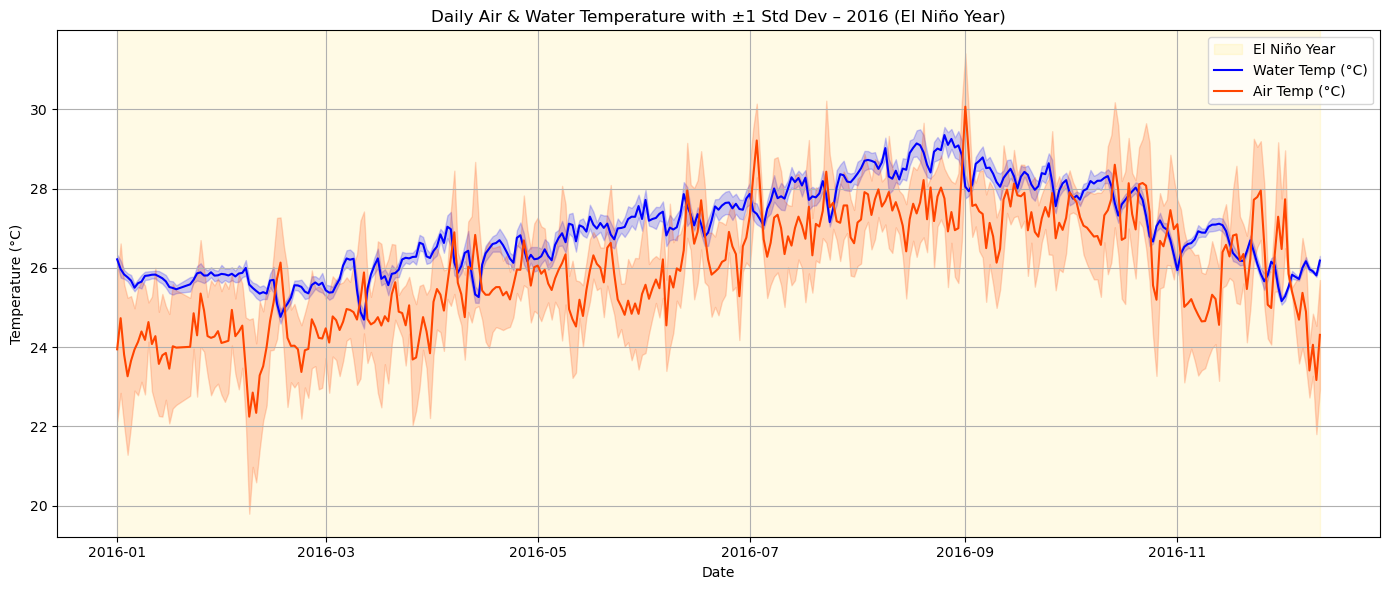

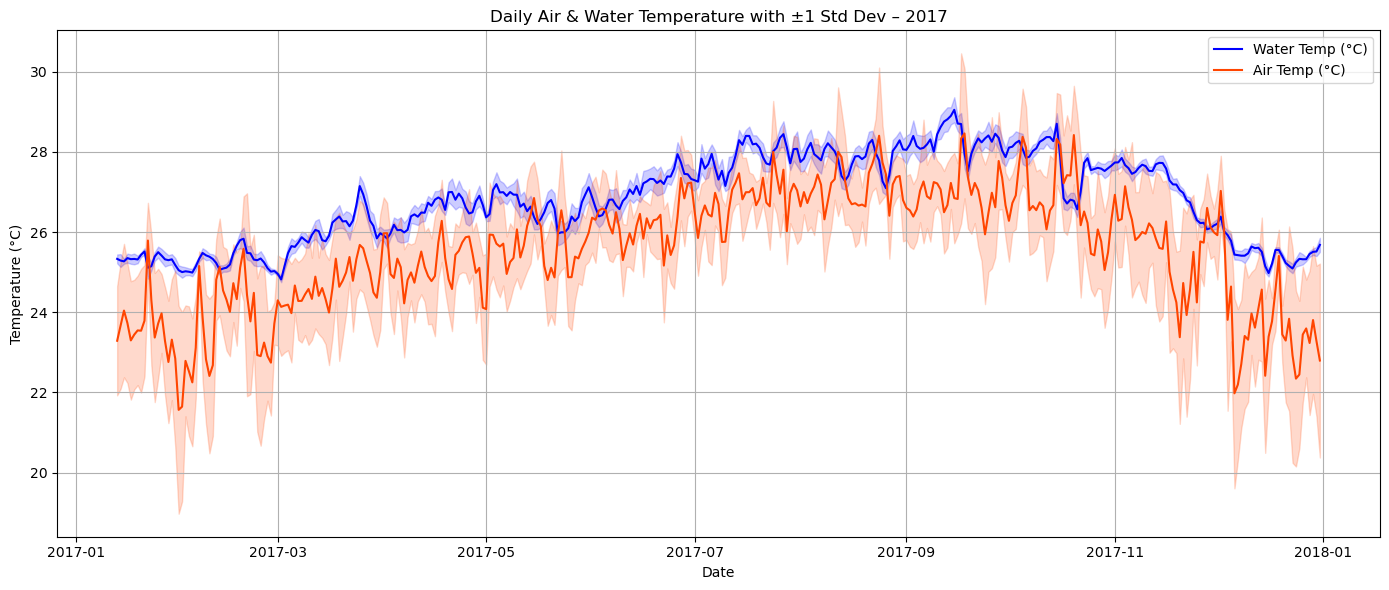

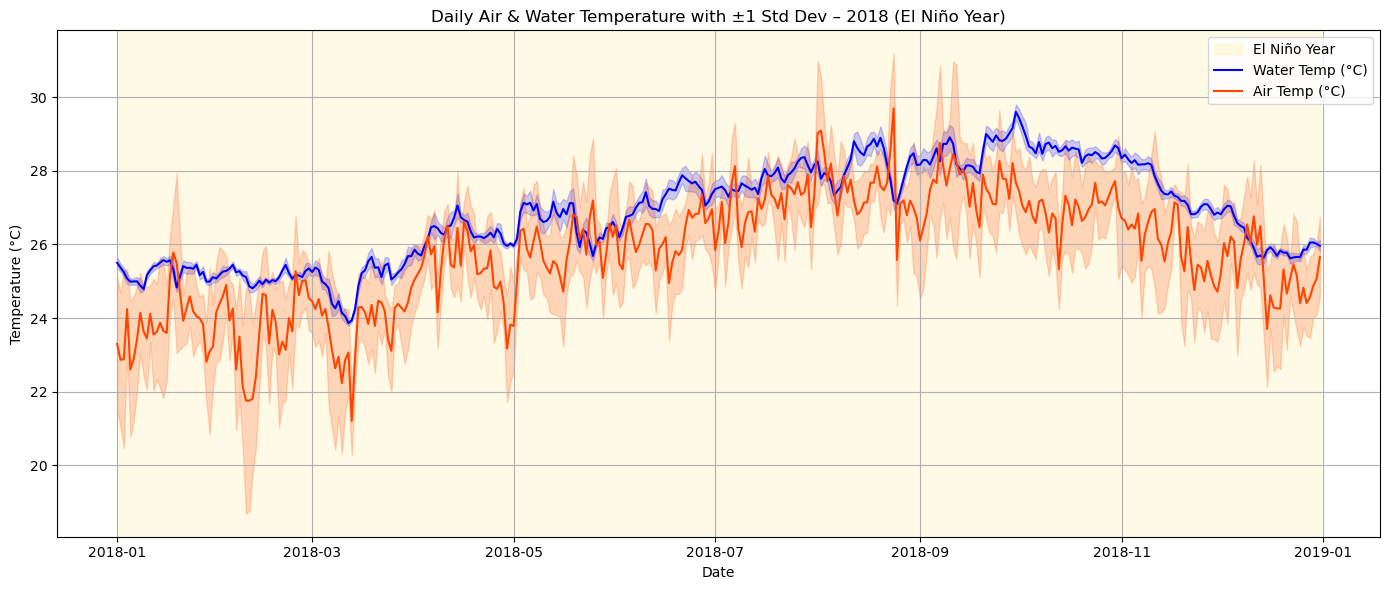

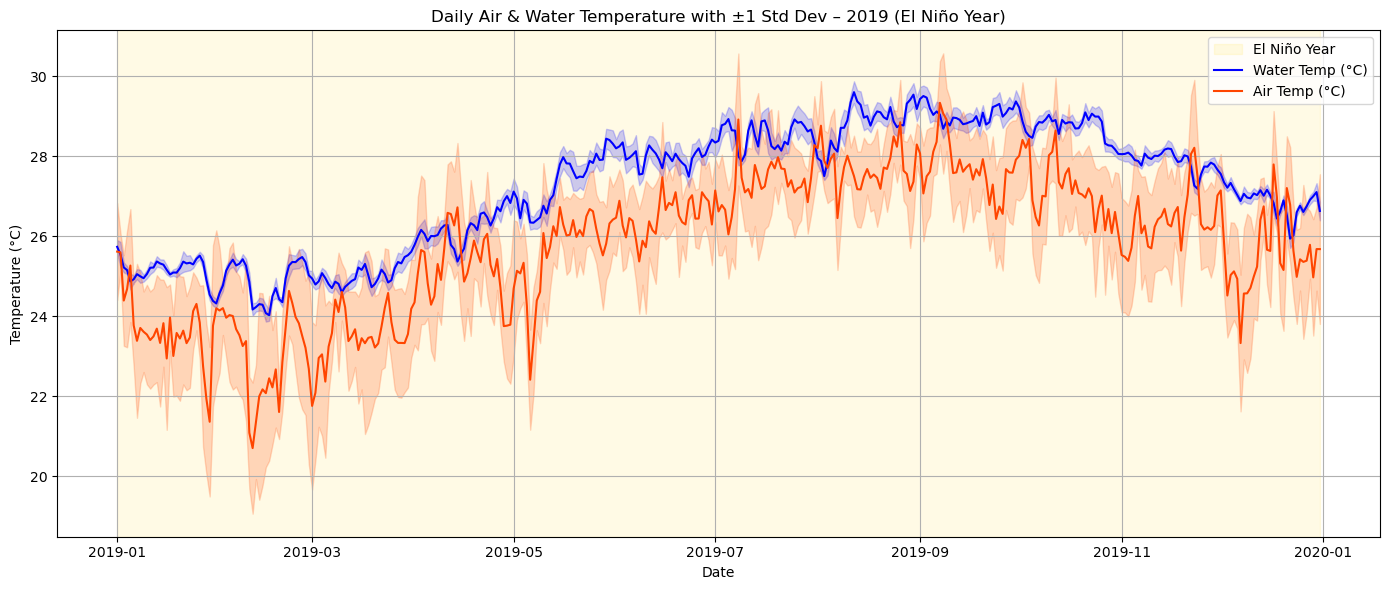

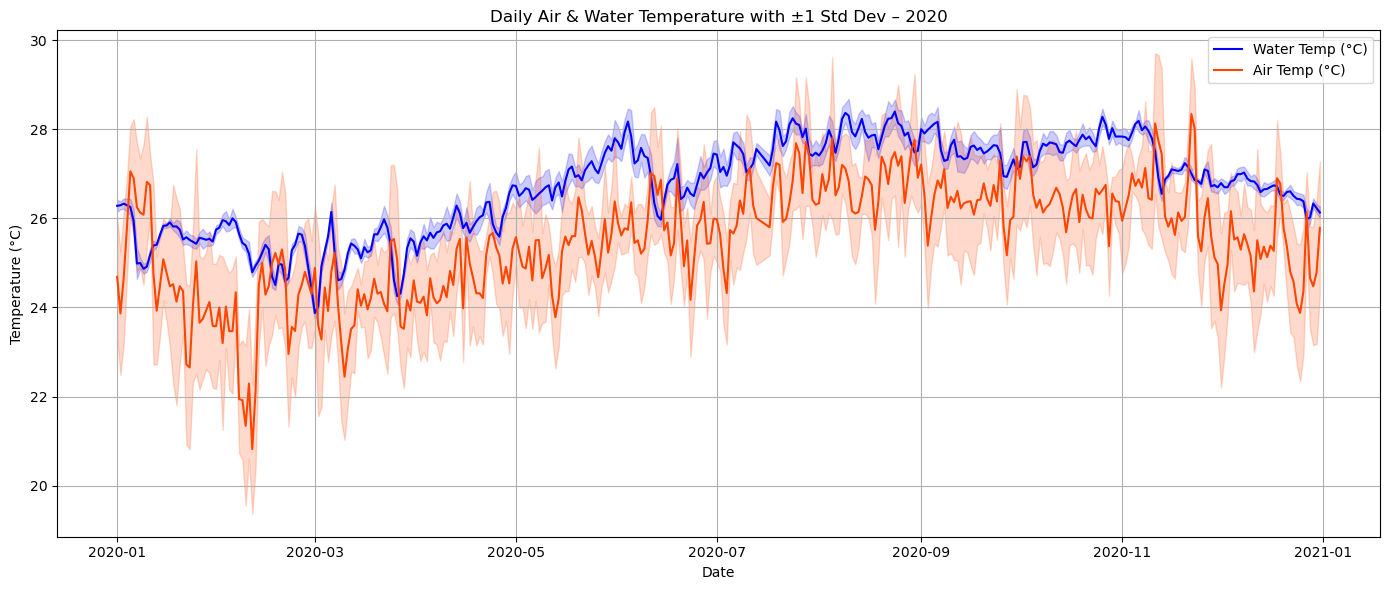

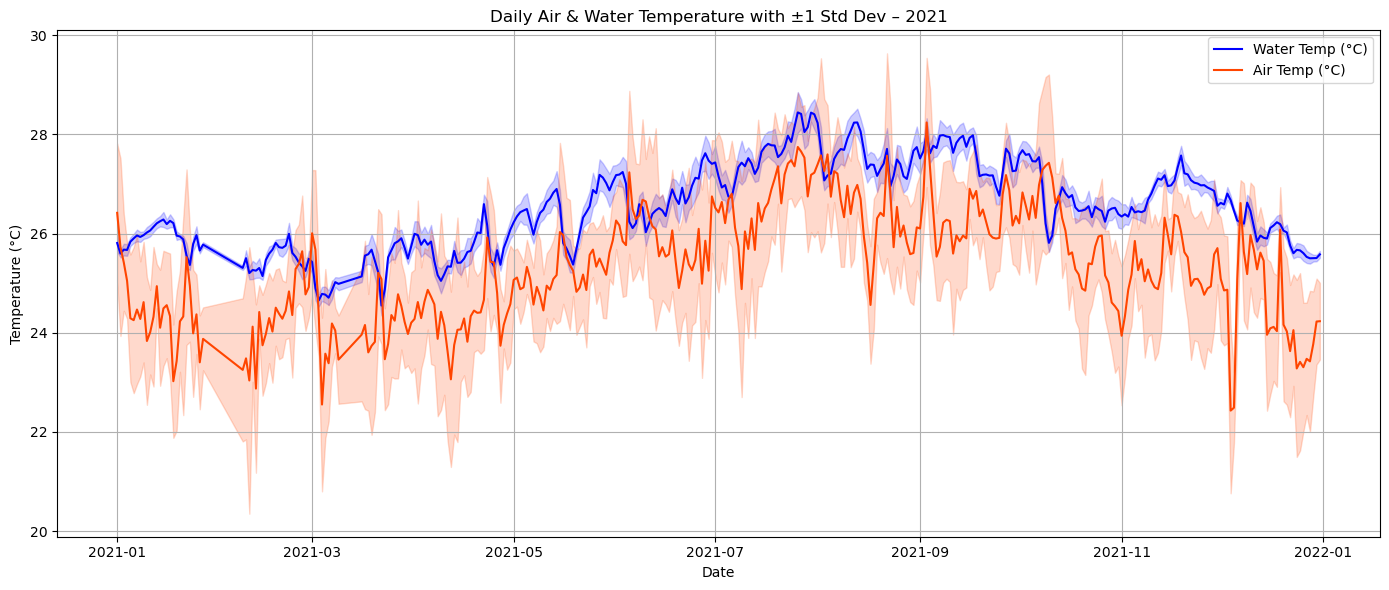

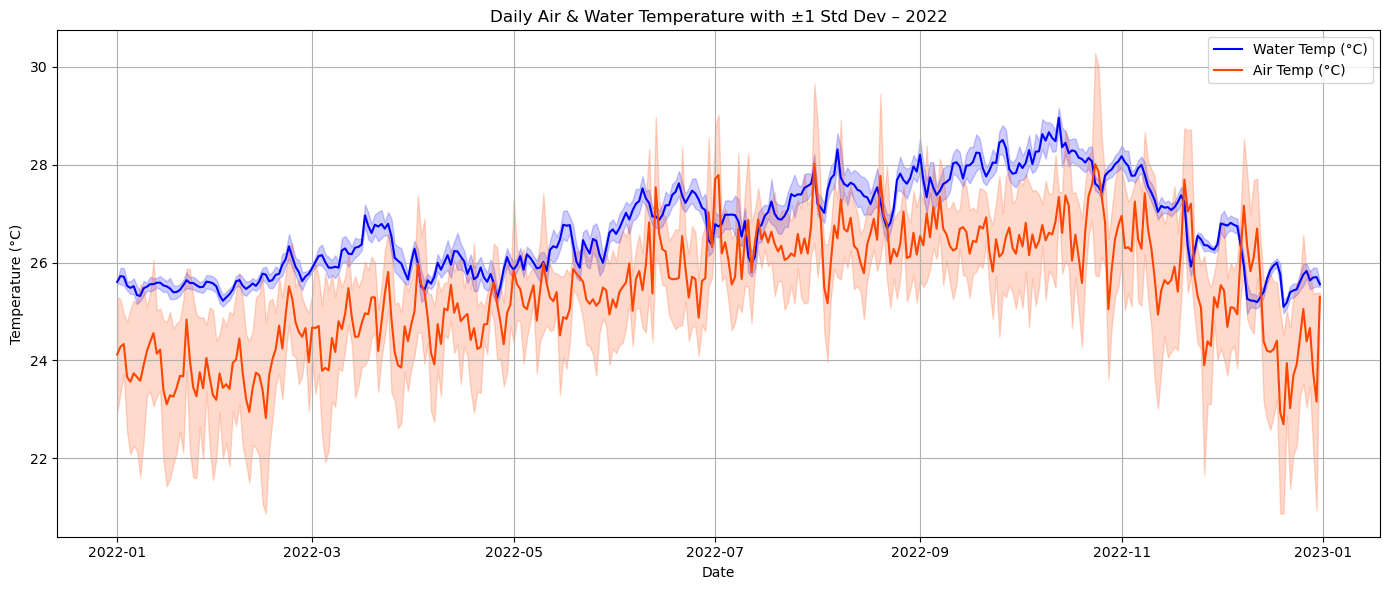

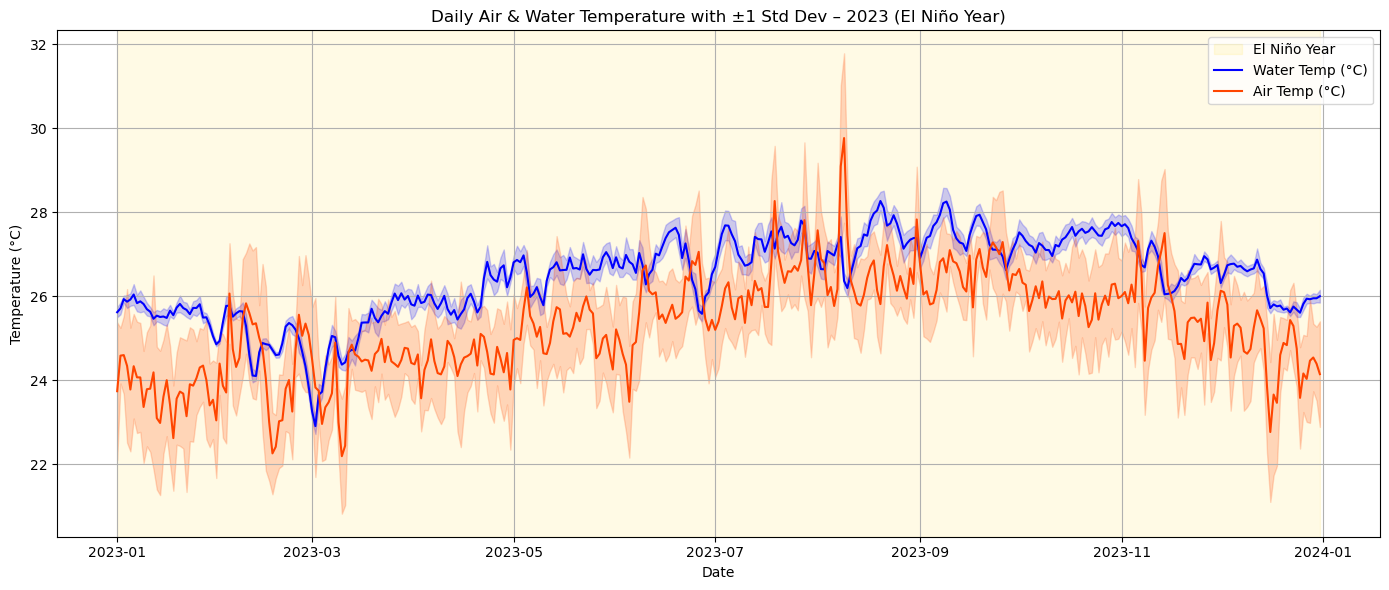

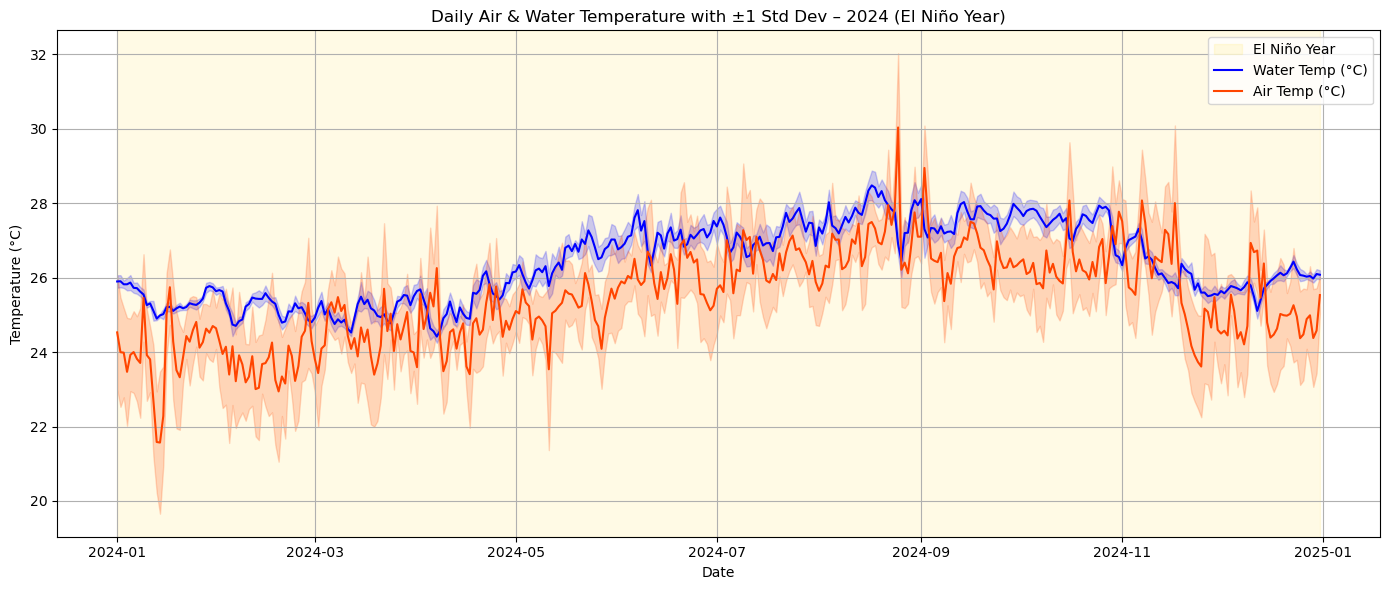

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define El Niño years
el_nino_years = [2015, 2016, 2018, 2019, 2023, 2024]

# Loop over each year
for year in range(2016, 2025):
    df_year = df_all[df_all.index.year == year].dropna(subset=['ATMP', 'WTMP'])

    # Daily means and std dev
    daily = df_year.resample('D').agg({
        'ATMP': ['mean', 'std'],
        'WTMP': ['mean', 'std']
    }).dropna()

    # Flatten column names
    daily.columns = ['ATMP_mean', 'ATMP_std', 'WTMP_mean', 'WTMP_std']

    # Setup plot
    plt.figure(figsize=(14, 6))

    # Optional: Light background for El Niño years
    if year in el_nino_years:
        plt.axvspan(daily.index.min(), daily.index.max(), color='gold', alpha=0.1, label='El Niño Year')

    # Plot water temp line and SD band
    plt.plot(daily.index, daily['WTMP_mean'], color='blue', label='Water Temp (°C)')
    plt.fill_between(daily.index,
                     daily['WTMP_mean'] - daily['WTMP_std'],
                     daily['WTMP_mean'] + daily['WTMP_std'],
                     color='blue', alpha=0.2)

    # Plot air temp line and SD band
    plt.plot(daily.index, daily['ATMP_mean'], color='orangered', label='Air Temp (°C)')
    plt.fill_between(daily.index,
                     daily['ATMP_mean'] - daily['ATMP_std'],
                     daily['ATMP_mean'] + daily['ATMP_std'],
                     color='orangered', alpha=0.2)

    # Labels and styling
    title_suffix = " (El Niño Year)" if year in el_nino_years else ""
    plt.title(f'Daily Air & Water Temperature with ±1 Std Dev – {year}{title_suffix}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Save the figure
    #plt.savefig(f'daily_air_water_temp_{year}.png', dpi=300)
    #plt.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define El Niño years
el_nino_years = [2015, 2016, 2018, 2019, 2023, 2024]

# Loop over each year
for year in range(2016, 2025):
    df_year = df_all[df_all.index.year == year].dropna(subset=['ATMP', 'WTMP'])

    # Daily means and std dev
    daily = df_year.resample('D').agg({
        'ATMP': ['mean', 'std'],
        'WTMP': ['mean', 'std']
    }).dropna()

    # Flatten column names
    daily.columns = ['ATMP_mean', 'ATMP_std', 'WTMP_mean', 'WTMP_std']

    # Setup plot
    plt.figure(figsize=(14, 6))

    # Optional: Light background for El Niño years
    if year in el_nino_years:
        plt.axvspan(daily.index.min(), daily.index.max(), color='gold', alpha=0.1, label='El Niño Year')

    # Plot water temp line and SD band
    plt.plot(daily.index, daily['WTMP_mean'], color='blue', label='Water Temp (°C)')
    plt.fill_between(daily.index,
                     daily['WTMP_mean'] - daily['WTMP_std'],
                     daily['WTMP_mean'] + daily['WTMP_std'],
                     color='blue', alpha=0.2)

    # Plot air temp line and SD band
    plt.plot(daily.index, daily['ATMP_mean'], color='orangered', label='Air Temp (°C)')
    plt.fill_between(daily.index,
                     daily['ATMP_mean'] - daily['ATMP_std'],
                     daily['ATMP_mean'] + daily['ATMP_std'],
                     color='orangered', alpha=0.2)

    # Labels and styling
    title_suffix = " (El Niño Year)" if year in el_nino_years else ""
    plt.title(f'Daily Air & Water Temperature with ±1 Std Dev – {year}{title_suffix}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Save the figure
    plt.savefig(f'daily_air_water_temp_{year}.png', dpi=300)
    plt.close()
